## Demo for Comparing `Neuron Population` Information from Map and SCKAN

In [1]:
from pprint import pprint
import requests
import pandas as pd
from mapknowledge import KnowledgeStore
import plot_neuron_diagram as plot_neuron

In [2]:
# Initialising the pg database endpoint
pg_endpoint = "https://mapcore-demo.org/devel/flatmap/v4/competency/"

### Get List of Data Source
Knowledge sources in the competency query system can include SCKAN versions (e.g., sckan-2024-09-21) as well as available flatmaps (e.g., 2b76d336-5c56-55e3-ab1e-795d6c63f9c1 for the male flatmap). While a dedicated query for listing all available sources is not yet implemented, it will be added in the future. For now, the available sources include:


In [3]:
MALE_FLATMAP = "2b76d336-5c56-55e3-ab1e-795d6c63f9c1"
FEMALE_FLATMAP = "91359a0f-9e32-5309-b365-145d9956817d"
RAT_FLATMAP = "fb6d0345-cb70-5c7e-893c-d744a6313c95"
SCKAN = "sckan-2024-09-21"

In [4]:
# A function to get the query definition
def get_query_parameters(query_id):
    url = pg_endpoint + 'queries/' + str(query_id)
    response = requests.get(url)
    
    if response.status_code in (200, 201):
        return response.json()  # Return the query definition as a JSON object
    else:
        print(f"Error {response.status_code}: {response.json()}")
        return None

# A function to execute a query and return results from PostgreSQL
def execute(query):
    url = pg_endpoint + 'query'
    headers = {"Content-Type": "application/json"}
    
    response = requests.post(url, json=query, headers=headers)
    
    if response.status_code in (200, 201):
        return response.json().get('results', [])  # Safely get 'results' from response
    else:
        print(f"Error {response.status_code}: {response.json()}")
        return None 

In [5]:
def get_neuron_populations(source_id, feature_id):
    query = {
        'query_id': '1', 
        'parameters': [
            {
                'column': 'feature_id', 
                'value': feature_id # Aortic arch depressor nerve
            }, 
            {
                'column': 'source_id', 
                'value': source_id
            }
        ]
    }
    
    # Execute the query and print results
    query_results = execute(query)
    
    if query_results:
        return query_results
    else:
        print("Query execution failed or returned no results.")

In [6]:
get_neuron_populations(MALE_FLATMAP, 'ILX:0738312')

{'keys': ['source_id', 'path_id'],
 'values': [['2b76d336-5c56-55e3-ab1e-795d6c63f9c1',
   'ilxtr:neuron-type-aacar-12'],
  ['2b76d336-5c56-55e3-ab1e-795d6c63f9c1',
   'ilxtr:neuron-type-bolew-unbranched-8']]}

In [7]:
get_neuron_populations(SCKAN, 'ILX:0738312')

{'keys': ['source_id', 'path_id'],
 'values': [['sckan-2024-09-21', 'ilxtr:neuron-type-aacar-12'],
  ['sckan-2024-09-21', 'ilxtr:neuron-type-bolew-unbranched-8']]}

In [8]:
def check_flatmap(flatmap_id, feature_id):
    flatmap = get_neuron_populations(flatmap_id, feature_id)["values"]
    sckan = get_neuron_populations(SCKAN, feature_id)["values"]
    flatmap_v = [i[1] for i in flatmap]
    sckan_v = [i[1] for i in sckan]
    print("===On Both===")
    on_both = [i for i in flatmap_v if i in sckan_v]
    print(on_both)
    print("===Only On Flatmap===")
    print([i for i in flatmap_v if i not in on_both])
    print("===Only On Sckan===")
    print([i for i in sckan_v if i not in on_both])

In [9]:
check_flatmap(MALE_FLATMAP, 'UBERON:0002107') #liver

===On Both===
[]
===Only On Flatmap===
['ilxtr:sparc-nlp/liver/109', 'ilxtr:sparc-nlp/liver/110', 'ilxtr:sparc-nlp/liver/111', 'ilxtr:sparc-nlp/liver/112', 'ilxtr:sparc-nlp/liver/114', 'ilxtr:sparc-nlp/liver/119', 'ilxtr:sparc-nlp/liver/121', 'ilxtr:sparc-nlp/liver/122', 'ilxtr:sparc-nlp/liver/123', 'ilxtr:sparc-nlp/liver/124', 'ilxtr:sparc-nlp/liver/125', 'ilxtr:sparc-nlp/liver/127']
===Only On Sckan===
[]


In [10]:
check_flatmap(MALE_FLATMAP, 'UBERON:0000948') #heart

===On Both===
['ilxtr:neuron-type-aacar-10a', 'ilxtr:neuron-type-aacar-11', 'ilxtr:neuron-type-aacar-4', 'ilxtr:neuron-type-aacar-6', 'ilxtr:neuron-type-aacar-7a', 'ilxtr:neuron-type-aacar-7v', 'ilxtr:neuron-type-aacar-8a', 'ilxtr:neuron-type-aacar-8v', 'ilxtr:neuron-type-aacar-9a', 'ilxtr:neuron-type-aacar-9v']
===Only On Flatmap===
[]
===Only On Sckan===
['ilxtr:neuron-type-aacar-13', 'ilxtr:neuron-type-aacar-5']


In [11]:
check_flatmap(FEMALE_FLATMAP, 'UBERON:0002048') #lung

===On Both===
[]
===Only On Flatmap===
[]
===Only On Sckan===
[]


In [12]:
check_flatmap(RAT_FLATMAP, 'UBERON:0002113') #kidney

===On Both===
['ilxtr:sparc-nlp/kidney/136', 'ilxtr:sparc-nlp/kidney/139', 'ilxtr:sparc-nlp/kidney/141', 'ilxtr:sparc-nlp/kidney/147', 'ilxtr:sparc-nlp/kidney/147-1', 'ilxtr:sparc-nlp/kidney/148', 'ilxtr:sparc-nlp/kidney/155']
===Only On Flatmap===
['ilxtr:sparc-nlp/kidney/132', 'ilxtr:sparc-nlp/kidney/134', 'ilxtr:sparc-nlp/kidney/135', 'ilxtr:sparc-nlp/kidney/137', 'ilxtr:sparc-nlp/kidney/138', 'ilxtr:sparc-nlp/kidney/143', 'ilxtr:sparc-nlp/kidney/144', 'ilxtr:sparc-nlp/kidney/145', 'ilxtr:sparc-nlp/kidney/150', 'ilxtr:sparc-nlp/kidney/152']
===Only On Sckan===
[]


In [13]:
check_flatmap(MALE_FLATMAP, 'UBERON:0002113') #kidney

===On Both===
['ilxtr:sparc-nlp/kidney/136', 'ilxtr:sparc-nlp/kidney/139', 'ilxtr:sparc-nlp/kidney/141', 'ilxtr:sparc-nlp/kidney/147', 'ilxtr:sparc-nlp/kidney/147-1', 'ilxtr:sparc-nlp/kidney/148', 'ilxtr:sparc-nlp/kidney/155']
===Only On Flatmap===
['ilxtr:sparc-nlp/kidney/132', 'ilxtr:sparc-nlp/kidney/134', 'ilxtr:sparc-nlp/kidney/135', 'ilxtr:sparc-nlp/kidney/137', 'ilxtr:sparc-nlp/kidney/138', 'ilxtr:sparc-nlp/kidney/143', 'ilxtr:sparc-nlp/kidney/144', 'ilxtr:sparc-nlp/kidney/145', 'ilxtr:sparc-nlp/kidney/152']
===Only On Sckan===
[]


In [14]:
from graphviz import Digraph

def draw_graph(flatmap_id, edges):
    dot = Digraph(comment="UBERON-ILX Graph", format="png")
    
    node_id_map = {}
    
    def get_node_id(label: str) -> str:
        if label not in node_id_map:
            safe_id = label.replace(":", "_")
            node_id_map[label] = safe_id
            if check_missed(flatmap_id, label):
                dot.node(safe_id, label=label)
            else:
                dot.node(safe_id, label=label, style='filled', color='red')
        return node_id_map[label]
    
    for src, dst in edges:
        src_label = src[0]
        dst_label = dst[0]
        dot.edge(get_node_id(src_label), get_node_id(dst_label))
        
    return dot

In [15]:
def check_missed(flatmap_id, feature_id):
    return get_neuron_populations(flatmap_id, feature_id)["values"]

In [16]:
def get_edges(path_id):
    store = KnowledgeStore(sckan_version='sckan-2024-09-21')
    return store.entity_knowledge(path_id)['connectivity']

2025-08-28 14:05:55 [info     ] Map Knowledge version 1.2.2 with no cache type=knowledge
2025-08-28 14:05:55 [warning  ] Undefined SCICRUNCH_API_KEY: SciCrunch knowledge will not be looked up type=knowledge
2025-08-28 14:10:46 [info     ] Using knowledge source: sckan-2024-09-21 type=knowledge
2025-08-28 14:10:46 [info     ] Consulting NPO for knowledge about ilxtr:sparc-nlp/kidney/132 type=knowledge


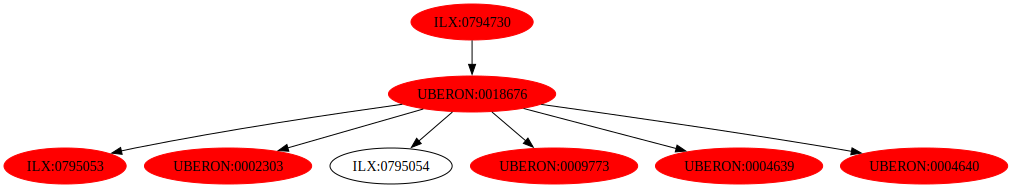

In [22]:
edges = get_edges('ilxtr:sparc-nlp/kidney/132')
draw_graph(RAT_FLATMAP, edges)

2025-08-28 14:16:03 [info     ] Map Knowledge version 1.2.2 with no cache type=knowledge
2025-08-28 14:16:03 [warning  ] Undefined SCICRUNCH_API_KEY: SciCrunch knowledge will not be looked up type=knowledge
2025-08-28 14:20:49 [info     ] Using knowledge source: sckan-2024-09-21 type=knowledge
2025-08-28 14:20:49 [info     ] Consulting NPO for knowledge about ilxtr:sparc-nlp/kidney/150 type=knowledge


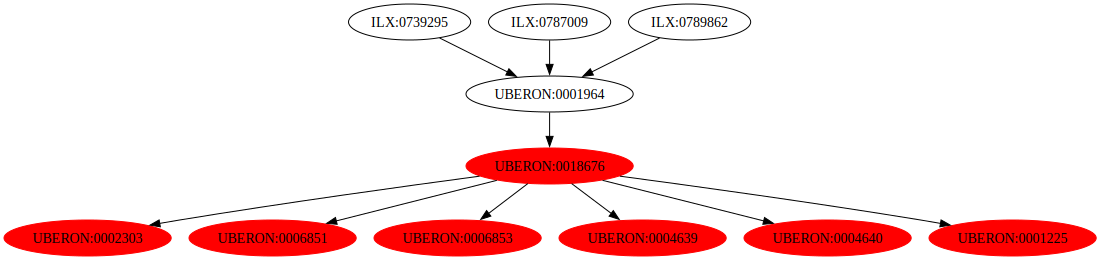

In [25]:
edges = get_edges('ilxtr:sparc-nlp/kidney/150')
draw_graph(RAT_FLATMAP, edges)

2025-08-28 14:11:05 [info     ] Map Knowledge version 1.2.2 with no cache type=knowledge
2025-08-28 14:11:05 [warning  ] Undefined SCICRUNCH_API_KEY: SciCrunch knowledge will not be looked up type=knowledge
2025-08-28 14:15:53 [info     ] Using knowledge source: sckan-2024-09-21 type=knowledge
2025-08-28 14:15:53 [info     ] Consulting NPO for knowledge about ilxtr:neuron-type-aacar-13 type=knowledge


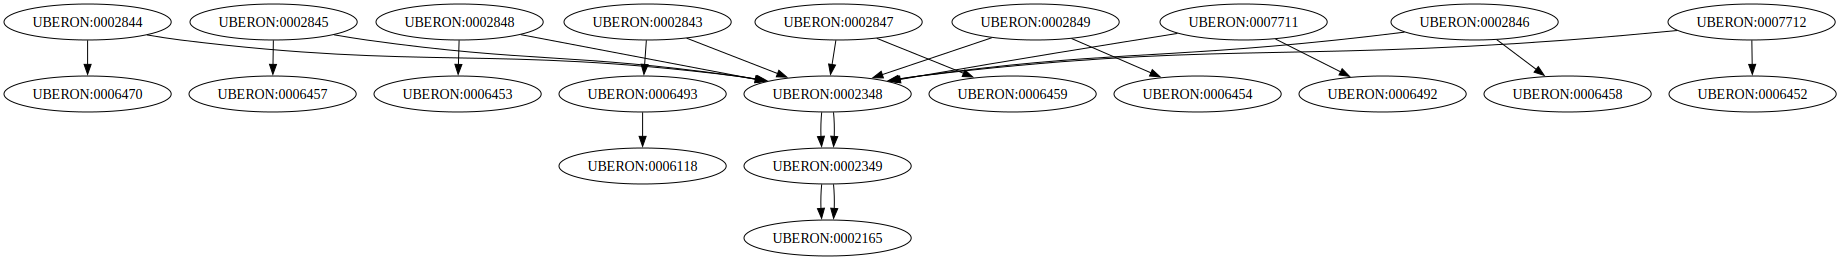

In [24]:
edges = get_edges('ilxtr:neuron-type-aacar-13')
draw_graph(RAT_FLATMAP, edges)

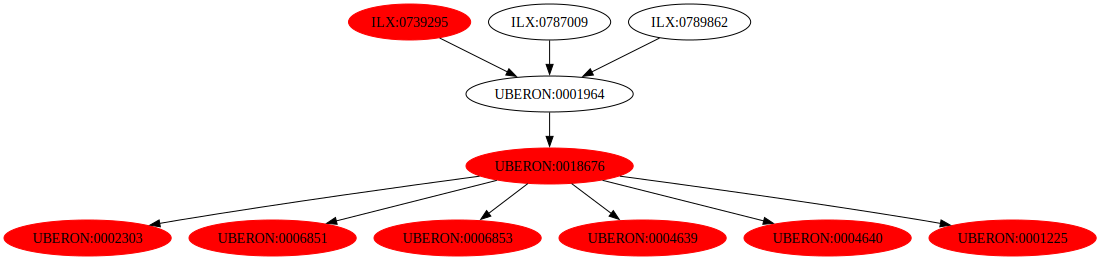

In [26]:
draw_graph(FEMALE_FLATMAP, edges)